In [5]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [6]:
df = pd.read_csv('/content/BTC-USD.csv')
print(df)

                   datetime      open      high       low     close  \
0       2016-12-02 00:00:00    754.00    754.00    753.77    754.00   
1       2016-12-02 00:15:00    754.00    754.32    753.53    754.32   
2       2016-12-02 00:30:00    754.32    755.35    754.26    755.08   
3       2016-12-02 00:45:00    755.08    757.00    754.60    756.98   
4       2016-12-02 01:00:00    756.98    758.95    756.98    758.95   
...                     ...       ...       ...       ...       ...   
162620  2021-07-25 08:45:00  34636.20  34636.20  34490.89  34598.70   
162621  2021-07-25 09:00:00  34598.70  34650.04  34540.91  34540.93   
162622  2021-07-25 09:15:00  34540.92  34547.06  34423.69  34461.75   
162623  2021-07-25 09:30:00  34461.74  34514.48  34368.85  34447.11   
162624  2021-07-25 09:45:00  34438.15  34570.78       NaN       NaN   

            volume  
0        40.491441  
1        64.968106  
2        83.616686  
3        71.896443  
4       138.051587  
...            ...  


In [7]:
df.shape

(162625, 6)

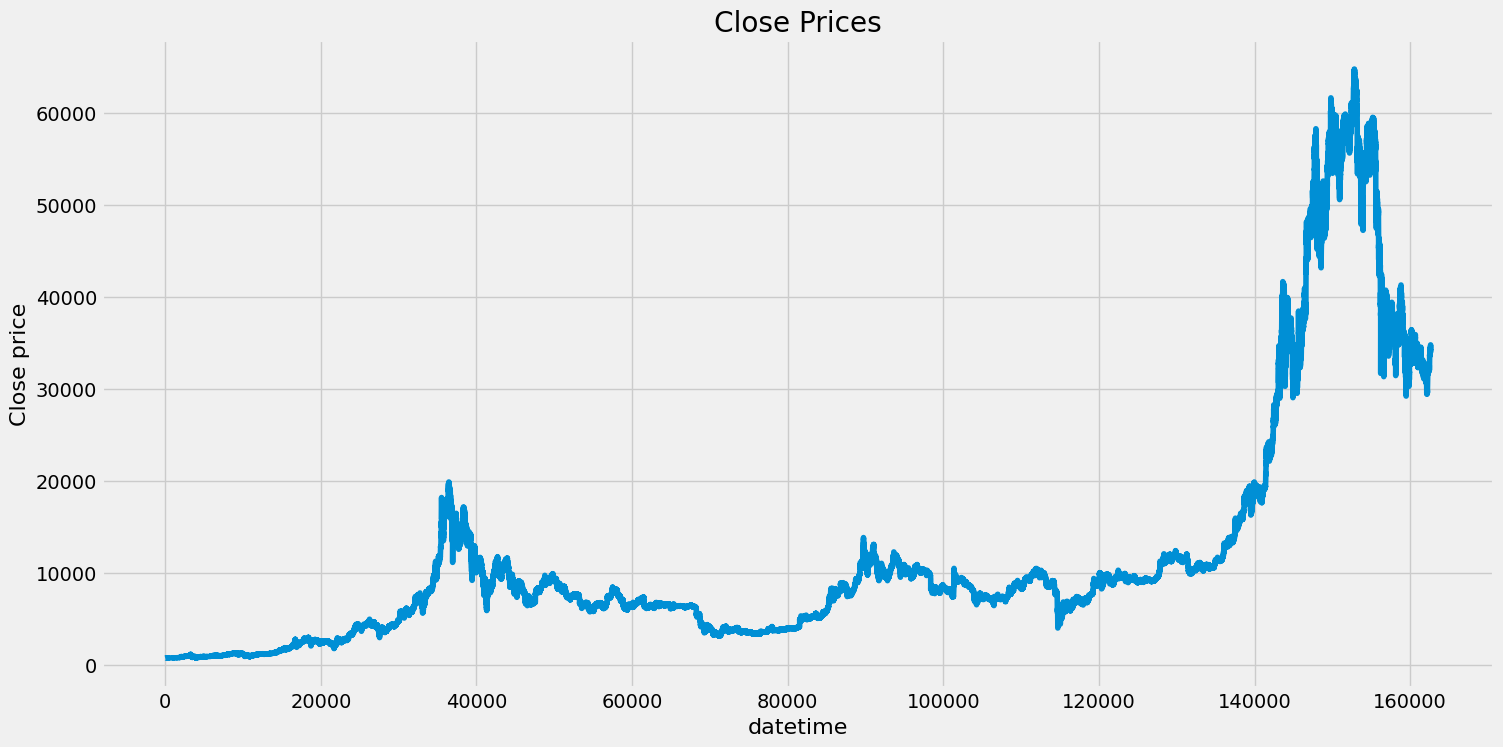

In [9]:
# visualize close 
plt.figure(figsize=(16,8))
plt.title('Close Prices')
plt.plot(df['close'])
plt.xlabel('datetime', fontsize=16)
plt.ylabel('Close price', fontsize=16)
plt.show()


In [10]:
data = df.filter(['close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

130100

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.15430676e-04],
       [1.20429027e-04],
       [1.32300112e-04],
       ...,
       [5.26625358e-01],
       [5.26396684e-01],
       [           nan]])

In [12]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00011543, 0.00012043, 0.0001323 , 0.00016198, 0.00019275,
       0.00018994, 0.00020915, 0.0002382 , 0.00024836, 0.00024039,
       0.00024039, 0.00027303, 0.00028522, 0.00031818, 0.00030287,
       0.0003174 , 0.00032177, 0.0003327 , 0.00031911, 0.00033395,
       0.00034942, 0.00035316, 0.00041096, 0.00032396, 0.00030943,
       0.0002646 , 0.00027382, 0.00032521, 0.0003024 , 0.0003124 ,
       0.00030943, 0.00032177, 0.00031989, 0.00031615, 0.00030662,
       0.00035738, 0.00038066, 0.00038253, 0.00038862, 0.00038409,
       0.00037691, 0.00034504, 0.0003869 , 0.00037488, 0.0003944 ,
       0.00037941, 0.00036785, 0.00033942, 0.00033333, 0.00033395,
       0.00033895, 0.00033895, 0.0003452 , 0.00035894, 0.00038331,
       0.00039471, 0.00042876, 0.00043439, 0.00043689, 0.00044204])]
[0.0004631284899621387]

[array([0.00011543, 0.00012043, 0.0001323 , 0.00016198, 0.00019275,
       0.00018994, 0.00020915, 0.0002382 , 0.00024836, 0.00024039,
       0.00024039, 0.00027303, 0.

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

 19919/130040 [===>..........................] - ETA: 1:20:15 - loss: 3.4922e-05

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('datetime', fontsize=16)
plt.plot(train['close'])
plt.plot(valid['close', 'predictions'])
plt.legend(['train', 'val', 'predictions'], loc='lower right')

In [ ]:
valid

In [ ]:
btc_quote = pd.read_csv('/content/BTC-USD.csv')
new_df = btc_quote.filter(['close'])
last_300_bars = new_df[-300:].values
last_300_bars_scaled = scaler.transform(last_300_bars)
X_test = []
X_test.append(last_300_bars_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)